In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## K-Means

**Fit and predict**

Tạo dữ liệu và phân cụm:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Buoi 3/Mall_Customers.csv')

# Chọn các cột cần thiết
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

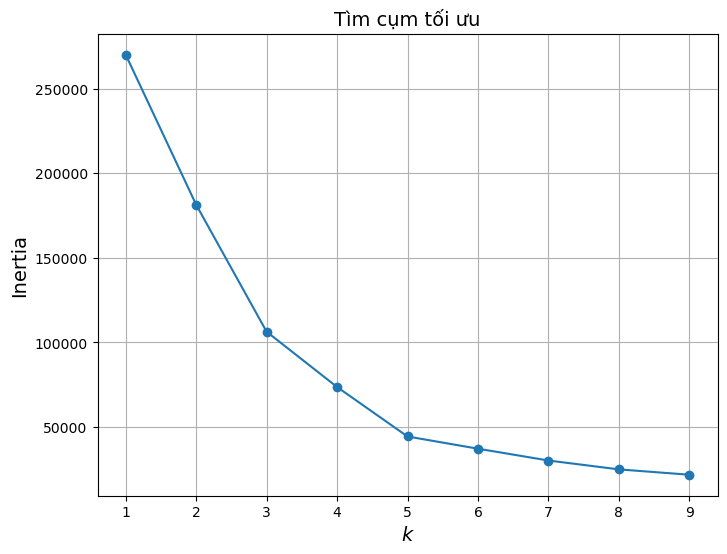

In [4]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Vẽ biểu đồ elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, marker='o')
plt.title('Tìm cụm tối ưu')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
#              arrowprops=dict(facecolor='black', shrink=0.1))
# plt.axis([1, 8.5, 0, 1300])


Vẽ:

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


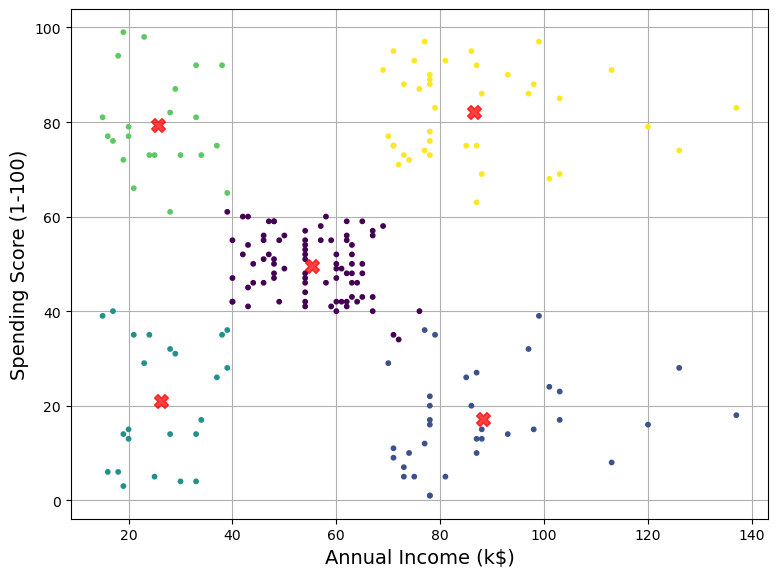

In [6]:
# Chọn số lượng cụm: 5
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Tiến hành phân cụm
y_pred = kmeans.fit_predict(X)
# # Định nghĩa hàm để lưu hình
# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

# Hàm để vẽ các cụm
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)", rotation=90)
    if y is not None:
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='X')

# Vẽ các cụm
plt.figure(figsize=(8, 6))
plot_clusters(X, y_pred)
plt.gca().set_axisbelow(True)
plt.grid()
# save_fig("clusters_plot")
plt.show()


### Ranh giới quyết định

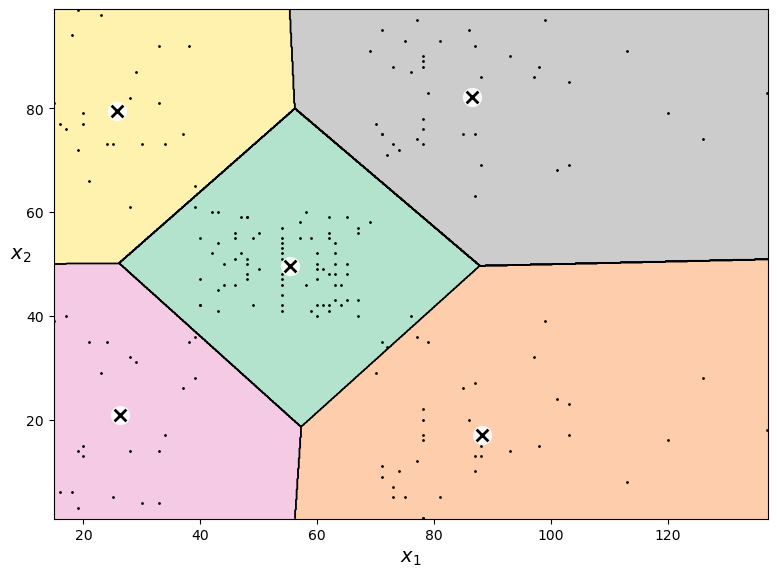

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

#### Chạy thuật toán K-Means cho 1, 2 và 3 lần lặp:

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


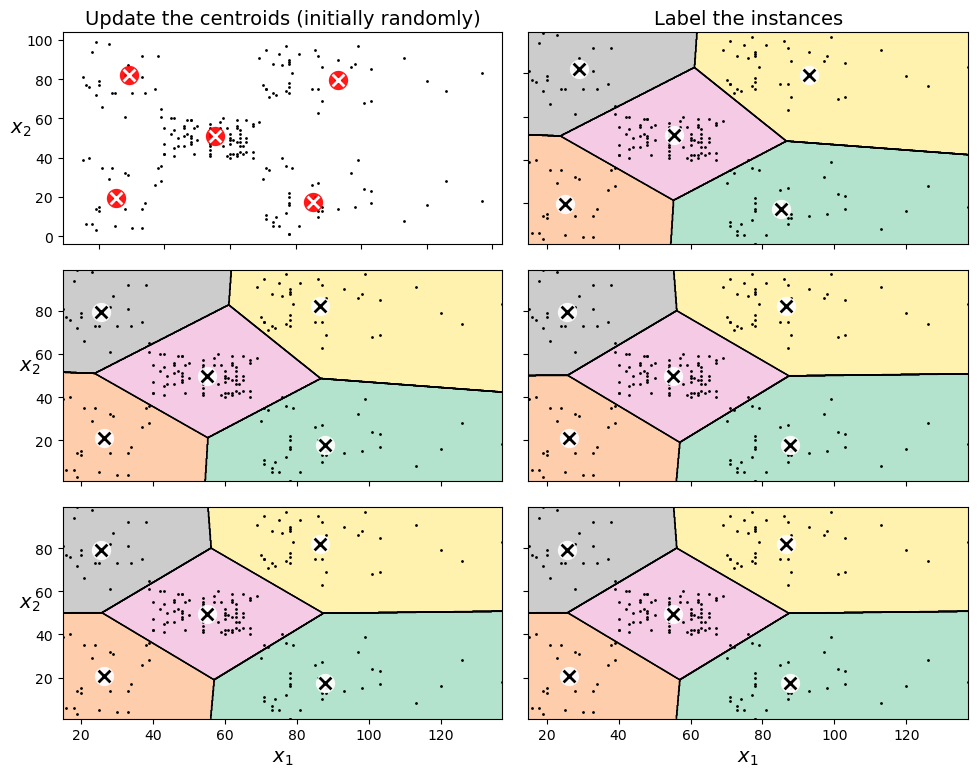

In [13]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=10, max_iter=1, random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=10, max_iter=2, random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=10, max_iter=3, random_state=5)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

Cụm:
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]
Cụm 4 là cụm có khách hàng tiềm năng - Annual Income và Spending Score cao nhất


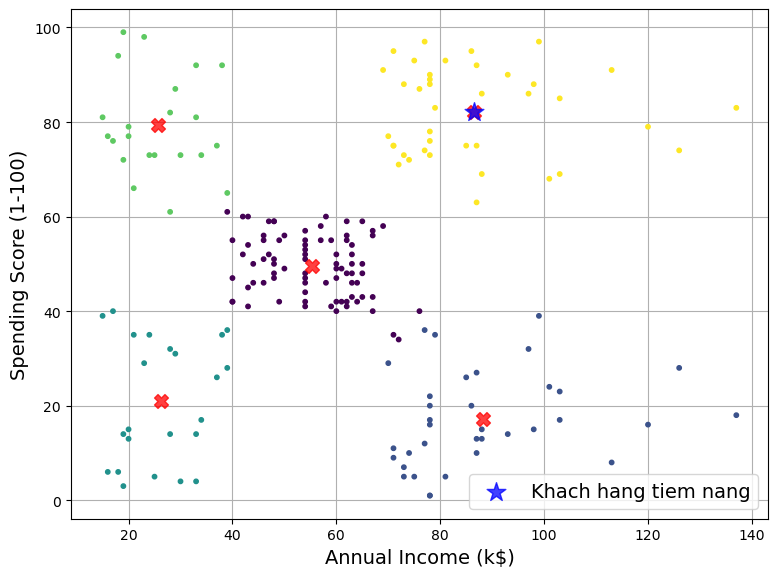

In [14]:
# Tính toán trung bình Annual Income và Spending Score cho từng cụm
cluster_centers = kmeans.cluster_centers_
print("Cụm:")
print(cluster_centers)

# Tìm cụm có Annual Income và Spending Score cao nhất
target_cluster = np.argmax(np.sum(cluster_centers, axis=1))
print(f"Cụm {target_cluster} là cụm có khách hàng tiềm năng - Annual Income và Spending Score cao nhất")

# Vẽ biểu đồ các cụm và đánh dấu cụm tiềm năng
plt.figure(figsize=(8, 6))
plot_clusters(X, y_pred)
plt.scatter(cluster_centers[target_cluster, 0], cluster_centers[target_cluster, 1], c='blue', s=200, alpha=0.75, marker='*', label='Khach hang tiem nang')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("potential_customer_cluster_plot")
plt.show()

## Kết luận
### Cụm 4 là cụm có khách hàng tiềm năng - Annual Income và Spending Score cao nhất